In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def variable_count(att):
    types = pd.unique(att)
    no_of_types = len(types)
    counts = att.value_counts() # count of each unique attr
    return no_of_types, counts, types

In [ ]:
def gini_of_attribute(no_of_types, counts, rows, cla, types, att1, cl):
    gini_a = 0
    type_cl_count = 0
    type_count = 0
    gini = []
    div_index = 0

    if no_of_types == 2:
        for i in range(len(types)):
            temp = df.loc[df[att1.name] == types[i]]
            type_count = len(temp)
            p = 1
            for j in range(len(cla)):
                temp = df.loc[(df[att1.name] == types[i]) & (df[cl.name] == cla[j])]
                type_cl_count = len(temp)
                p -= pow((type_cl_count/type_count), 2)
            gini_a += (type_count/rows) * p

    elif no_of_types > 2:
        for i in range(no_of_types):
            temp1 = df.loc[df[att1.name] == types[i]]
            temp2 = df.loc[df[att1.name] != types[i]]
            type_count1 = len(temp1)
            type_count2 = len(temp2)
            p1 = 1
            p2 = 1
            for j in range(len(cla)):
                temp3 = df.loc[(df[att1.name] == types[i]) & (df[cl.name] == cla[j])]
                type_cl_count1 = len(temp3)
                p1 -= pow((type_cl_count1/type_count1), 2)
                temp4 = df.loc[(df[att1.name] != types[i]) & (df[cl.name] == cla[j])]
                type_cl_count2 = len(temp4)
                p2 -= pow((type_cl_count2/type_count2), 2)

            gini.append((type_count1/rows) * p1 + (type_count2/rows) * p2)
            gini_a = min(gini)
            div_index = gini.index(gini_a)
    return gini_a, div_index

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ML/CART.csv')
col = list(df.columns.values.tolist())

In [ ]:
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle-aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes


In [ ]:
cl = df.iloc[:, -1]
# cla = [yes,no]
no_of_types, counts, cla = variable_count(cl)
rows = len(cl)
gini = 1 - (pow((counts[0]/rows), 2) + pow((counts[1]/rows), 2))
print(gini)

0.4591836734693877


In [ ]:
gini_a = []
div = []
t = []
att = len(df.columns) - 1

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def plot_dt():
  df['Age'] = df['Age'].apply(lambda x: 1 if x == 'youth' else (2 if x == 'middle' else 3))
  df['Income'] = df['Income'].apply(lambda x: 1 if x == 'low' else (2 if x == 'medium' else 3))
  df['Student'] = df['Student'].apply(lambda x: 1 if x == 'no' else 2)
  df['Credit_Rating'] = df['Credit_Rating'].apply(lambda x: 1 if x == 'fair' else 2)
  df['Buys_Computer'] = df['Buys_Computer'].apply(lambda x: 1 if x == 'no' else 2)

  X = df.iloc[:, 0:3]
  y = df.iloc[:, -1]

  # X_train, X_test, y_train, y_test = train_test_split(X, y)

  clf = tree.DecisionTreeClassifier()
  clf.fit(X, y)

  tree.plot_tree(clf)


In [ ]:
for i in range(att):
    att1 = df.iloc[:, i]
    no_of_types, counts, types = variable_count(att1)
    t.append(types)
    gini_a1, div_index = gini_of_attribute(no_of_types, counts, rows, cla, types, att1, cl)
    gini_a.append(gini_a1)
    div.append(div_index)

In [ ]:
div

[1, 0, 0, 0]

In [ ]:
print(gini_a)

[0.35714285714285715, 0.44285714285714295, 0.3673469387755103, 0.42857142857142855]


In [ ]:
gini

0.4591836734693877

In [ ]:
delta_gini = list(map(lambda item : gini - item, gini_a))
print(delta_gini) # highest delta gini wala lenge
index = delta_gini.index(max(delta_gini))
print("\n")
print(col[index], "is the root variable")


[0.10204081632653056, 0.01632653061224476, 0.09183673469387743, 0.030612244897959162]


Age is the root variable


tree based on root - Age
student (left)
income (right)


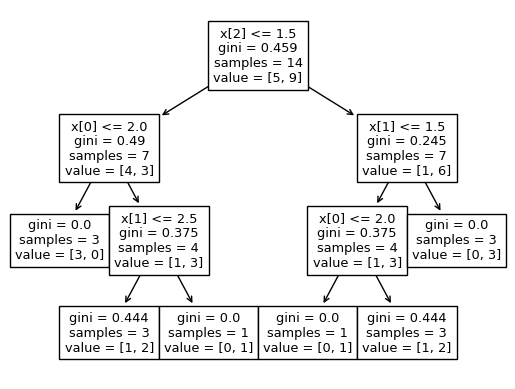

In [ ]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


def plot_decision_tree(df, gini_output, gini_attributes, delta_gini):

    # Find the feature with the highest delta Gini
    best_feature_index = delta_gini.index(max(delta_gini))

    # Prepare the data for training the decision tree
    X = df.iloc[:, 0:best_feature_index + 1]  # Features
    y = df.iloc[:, -1]  # Target variable

    # Train the decision tree classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
    plt.show()

# Call the function to plot the decision tree
plot_decision_tree(gini, gini_a, delta_gini, df)
